In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

data collection and procesing

In [2]:
gold_data = pd.read_csv("/content/gold_data.csv")

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data.shape

(2290, 6)

In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


checking missing values

In [8]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
correlation = gold_data.corr()

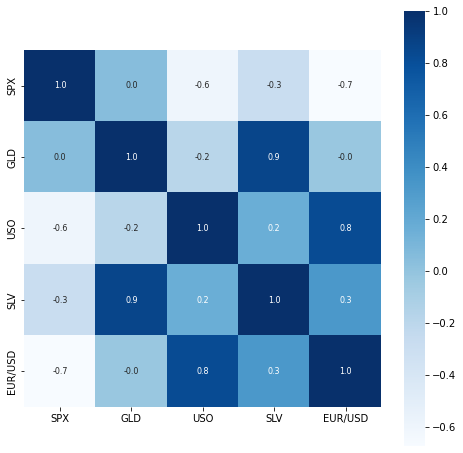

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')


correlation values of GLD

In [13]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


checking the distribution od GLD

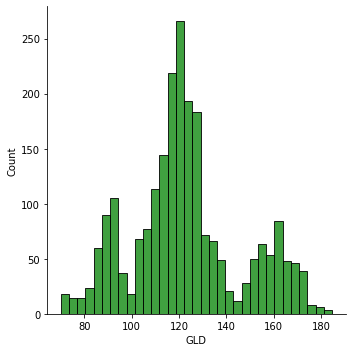

In [14]:
sns.displot(gold_data['GLD'], color='green')

In [18]:
X= gold_data.drop(['Date','GLD'], axis =1)
Y = gold_data['GLD']

In [19]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [20]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting into trainning data and testdata

In [21]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size =0.2, random_state=2)

midel trainning

In [23]:
regressor = RandomForestRegressor(n_estimators=100)

In [24]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

model evaluation

In [26]:
#prediction on test Data
test_data_predictions = regressor.predict(X_test)

In [27]:
print(test_data_predictions)

[168.55889938  81.64609988 115.90680024 127.72090046 120.66460128
 154.69159816 150.51379816 126.07079995 117.63159892 126.05100041
 116.60430126 171.21670074 141.05539864 167.81619809 115.02540038
 118.09410065 138.72290268 170.27850046 159.32330282 160.31519949
 155.11990031 125.39930026 175.51189906 156.84700289 125.17620035
  93.75279946  77.40620035 120.71990035 119.08249934 167.51510006
  88.13190042 124.88690021  91.0507005  117.67230013 121.16619946
 137.32300164 115.73350088 115.69880073 148.77040026 107.39160075
 104.53370226  87.19329789 126.5481004  117.92710031 152.08579911
 119.61069995 108.37909982 108.27689814  93.07920044 127.20129782
  75.17900054 113.62649931 121.15959995 111.23909915 118.81319882
 120.80589926 158.55280038 167.06090136 146.79799681  85.91519849
  94.16350029  86.84799912  90.52450032 118.99460064 126.44280106
 127.63279994 170.05819999 122.26049928 117.56039879  98.46300007
 168.23780094 142.9227985  132.4289022  121.15990216 120.4346994
 119.801000

In [28]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_predictions)
print("R suared error: " ,error_score)

R suared error:  0.989353756075616


compare the actual values and predicted values in a Plot

In [30]:
# convert to  y_ test to list
Y_test = list(Y_test)    


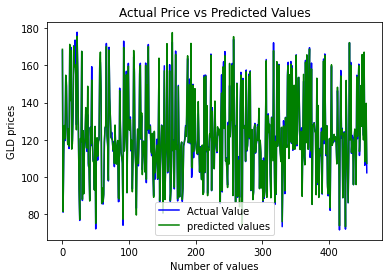

In [32]:
plt.plot(Y_test, color='blue', label="Actual Value")
plt.plot(test_data_predictions,color='green',label='predicted values')
plt.title('Actual Price vs Predicted Values')
plt.xlabel("Number of values")
plt.ylabel("GLD prices")
plt.legend()
plt.show()